# Breadth-depth dilemma

Notebook that goes through the reproduction of figures for the paper "The breadth-depth dilemma in a finite capacity model of decision-making". All the functions used are in "Functions_discrete.jl" Julia module.

In [1]:
using PyPlot, CurveFit, Distributions, SpecialFunctions

In [2]:
push!(LOAD_PATH, "./");

In [3]:
using Functions_BD

## Figure 2
### Panel (a)

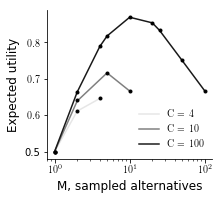

In [4]:
widthCM = 8
heightCM = 7
f = figure(figsize=(widthCM/2.54, heightCM/2.54), dpi=72)
ax = gca()
rc("text", usetex=true)
rc("font",family="serif", serif = "Computer Modern")
C = [4,10,100]
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
N_sim = 1E5
α = 1
β = 1
alice = false
colors = get_cmap("gray_r")
cindex = [0.1,0.5,0.9]
for j in 1:length(C)
    M = divisors(C[j])
    U_sim = zeros(length(M))
    U = zeros(length(M))
    var = zeros(length(M))
    for i in 1:length(M)
        L = ones(Int64,M[i]).*Int64(C[j]/M[i])
        U[i] = uni_utility_Bb(C[j],M[i],α,β,alice)
        U_sim[i] = utility_sim_Bb(L,α,β,N_sim,alice)[1]
    end
    ax.plot(M,U,"-", color = colors(cindex[j]), label=string("C = ",C[j]))
    ax.plot(M,U_sim,"ko",markersize = 3)
end
tight_layout(rect = [0.06, 0.04, 1, 1])
legend(loc=4,fontsize=10, ncol = 1, frameon =false);
xscale("log")
ylabel("Expected utility",fontsize = 12)
xlabel("M, sampled alternatives",fontsize = 12);
#savefig("./fig2a.pdf")

In [5]:
C = [2,3,5,7,10,30,100,300,1000,3000,10000]
max_U = zeros(length(C))
M_opt_flat = zeros(length(C))
max_U_rich = zeros(length(C))
M_opt_rich = zeros(length(C))
M_opt_poor = zeros(length(C))
max_U_poor = zeros(length(C))
α_poor = 1
β_poor = 3
α_rich = 3
β_rich = 1
α_flat = 1
β_flat = 1
alice = false
N_sim = 1E5
C_sim = 100
M_opt_rich_sim = zeros(length(C))
M_opt_flat_sim = zeros(length(C))
M_opt_poor_sim = zeros(length(C))
for j in 1:length(C)
    M = divisors(C[j])
    U_rich_sim = zeros(length(M))
    U_poor_sim = zeros(length(M))
    U_flat_sim = zeros(length(M))
    U_flat_sim = zeros(length(M))
    U_rich_ana = zeros(length(M))
    U_poor_ana = zeros(length(M))
    U_flat_ana = zeros(length(M))
    var_rich = zeros(length(C),length(M))
    var_poor = zeros(length(C),length(M))
    var_flat = zeros(length(C),length(M))
    for i in 1:length(M)        
        L = ones(Int64,M[i]).*Int64(C[j]/M[i])
        #Only simulate for low capacities, otherwise it takes too long
        if C[j] <= C_sim
            U_rich_sim[i],var_rich[j,i] = utility_sim_Bb(L,α_rich,β_rich,N_sim,alice)
            U_poor_sim[i],var_poor[j,i] = utility_sim_Bb(L,α_poor,β_poor,N_sim,alice)
            U_flat_sim[i],var_flat[j,i] = utility_sim_Bb(L,α_flat,β_flat,N_sim,alice)
        end
        U_flat_ana[i] = uni_utility_Bb(C[j],M[i],α_flat,β_flat,alice)
        U_rich_ana[i] = uni_utility_Bb(C[j],M[i],α_rich,β_rich,alice)
        U_poor_ana[i] = uni_utility_Bb(C[j],M[i],α_poor,β_poor,alice)
    end
    M_opt_flat[j] = M[findmax(U_flat_ana)[2]]
    M_opt_rich[j] = M[findmax(U_rich_ana)[2]]
    M_opt_poor[j] = M[findmax(U_poor_ana)[2]]
    if C[j] <= C_sim
        M_opt_rich_sim[j] = M[findmax(U_rich_sim)[2]]
        M_opt_flat_sim[j] = M[findmax(U_flat_sim)[2]]
        M_opt_poor_sim[j] = M[findmax(U_poor_sim)[2]]
    end
end

### Panel (b)

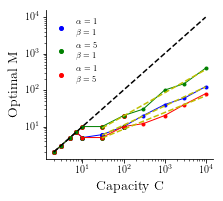

In [6]:
widthCM = 8
heightCM = 7
f = figure(figsize=(widthCM/2.54, heightCM/2.54), dpi=72)
ax = gca()
rc("text", usetex=true)
rc("font",family="serif", serif = "Computer Modern")

ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)

loglog(C,M_opt_flat_sim,"bo",label=string(L"$\alpha = 1$", "\n", L"$\beta = 1$"),markersize=4)
loglog(C,M_opt_flat,"b.-",linewidth = 1)
loglog(C,M_opt_rich_sim,"go",label=string(L"$\alpha = 5$", "\n", L"$\beta = 1$"),markersize=4)
loglog(C,M_opt_rich,"r.-",linewidth = 1)
loglog(C,M_opt_poor_sim,"ro",label=string(L"$\alpha = 1$", "\n", L"$\beta = 5$"),markersize=4)
loglog(C,M_opt_poor,"g.-",linewidth = 1)
fend = 4
start = fend + 2
#Show y = x only once
b1p,m1p=linear_fit(log.(C[1:fend]),log.(M_opt_rich[1:fend]))

b2p,m2p=linear_fit(log.(C[start:end]),log.(M_opt_rich[start:end]))
b2r,m2r=linear_fit(log.(C[start:end]),log.(M_opt_poor[start:end]))
b2f,m2f=linear_fit(log.(C[start:end]),log.(M_opt_flat[start:end]))

M_fitted1p = exp.(log.(C[1:end]).*m1p .+ b1p)
M_fitted2r = exp.(log.(C[start:end]).*m2r .+ b2r)
M_fitted2p = exp.(log.(C[start:end]).*m2p .+ b2p)
M_fitted2f = exp.(log.(C[start:end]).*m2f .+ b2f)

loglog(C[1:end],M_fitted1p,"k--")

loglog(C[start:end],M_fitted2f,"y--")#,label=string("m = ",round(m2r,digits=2)))
loglog(C[start:end],M_fitted2r,"y--")#,label=string("m = ",round(m2r,digits=2)))
loglog(C[start:end],M_fitted2p,"y--")

tight_layout(rect = [0.06, 0.04, 1, 1])

#tick_params(labelsize=12,direction = "out",top=false)

xlabel("Capacity C",fontsize=14)
ylabel("Optimal M",fontsize=14)

legend(loc=2,fontsize=8, ncol = 1, frameon =false);
#savefig("./fig2a.pdf")


### Panel (c)-(d)

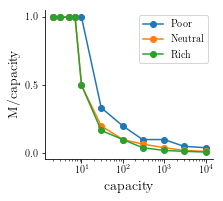

In [7]:
widthCM = 8
heightCM = 7
f = figure(figsize=(widthCM/2.54, heightCM/2.54), dpi=72)
ax = gca()
rc("text", usetex=true)
rc("font",family="serif", serif = "Computer Modern")

ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
semilogx(C,M_opt_poor./C,"-o",label="Poor")
semilogx(C,M_opt_flat./C,"-o",label="Neutral")
semilogx(C,M_opt_rich./C,"-o",label="Rich")
tight_layout(rect = [0.06, 0.04, 1, 1])
yticks([0,0.5,1])
#grid("on")
legend()
#xlim([0,64])
ylabel("M/capacity",fontsize = 14)
xlabel("capacity",fontsize = 14)
#savefig("./fig2c.pdf");

## Figure 3

In [8]:
C = collect(2:50)
max_U = zeros(length(C))
M_opt = zeros(length(C))
α = [1.5,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10,11,12,13,14,15,20]
β = [1.0,1.5,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10,11,12,13,14,15,20]
critical_c = zeros(length(α) + length(β))
prob = zeros(length(α) + length(β))
for b in length(β):-1:1
    prob[length(β) + 1 - b] = 1/(1 + β[b])
    i = 1
    terminate = false
    while i <= length(C) && terminate == false
        c = C[i]
        M = divisors(c)
        U = zeros(length(M))
        for i in 1:length(M)        
            U[i] = uni_utility_Bb(c,M[i],1,β[b])
        end
        M_opt = M[findmax(U)[2]]
        if M_opt < c
            critical_c[length(β) + 1 - b] = C[i-1]
            terminate = true
        else
            i += 1
            if C[i] == C[end]
                critical_c[length(β) + 1 - b] = C[end]
            end
        end
    end
end
for a in 1:length(α)
    prob[length(β) + a] = α[a]/(1 + α[a])
    i = 1
    terminate = false
    while i <= length(C) && terminate == false
        c = C[i]
        M = divisors(c)
        U = zeros(length(M))
        for i in 1:length(M)        
            U[i] = uni_utility_Bb(c,M[i],α[a],1)
        end
        M_opt = M[findmax(U)[2]]
        if M_opt < c
            critical_c[length(β) + a] = C[i-1]
            terminate = true
        else
            i += 1
            if C[i] == C[end]
                critical_c[length(β) + a] = C[end]
            end
        end
    end
end

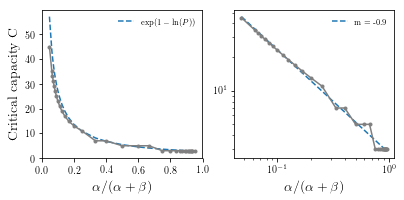

PyObject <matplotlib.legend.Legend object at 0x7fc8ba949c88>

In [9]:
widthCM = 15
heightCM = 7
f = figure(figsize=(widthCM/2.54, heightCM/2.54), dpi=72)
ax = gca()
rc("text", usetex=true)
rc("font",family="serif", serif = "Computer Modern")

ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
tight_layout(rect = [0.06, 0.04, 1, 1])


subplot(1,2,1)
plot(prob, exp.(1 .- log.(prob)) , "--", label = L"\exp(1- \ln(P))")
plot(prob,critical_c,"-o", color ="gray", markersize = 3)
ylabel("Critical capacity C",fontsize=14)
xlabel(L"\alpha/(\alpha + \beta)",fontsize=14)
legend(loc=1,fontsize=8, ncol = 1, frameon =false);

subplot(1,2,2)
max = length(prob) #length(β)
b,m=linear_fit(log.(prob[1:max]),log.(critical_c[1:max]))
M_fitted = exp.(log.(prob).*m .+ b)
loglog(prob, M_fitted, "--", label = "m = $(round(m,digits = 1))")
loglog(prob, critical_c, "o-", color = "gray", markersize = 3)

xlabel(L"\alpha/(\alpha + \beta)",fontsize=14)

legend(loc=1,fontsize=8, ncol = 1, frameon =false)
#savefig("./fig3a.pdf")

In [10]:
max_U = zeros(length(C))
M_opt = zeros(length(C))
α = [1.5,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10,11,12,13,14,15,20]
β = [1.0,1.5,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10,11,12,13,14,15,20]
exp_fit = zeros(length(α) + length(β))
prob = zeros(length(α) + length(β))
for b in length(β):-1:1
    prob[length(β) + 1 - b] = 1/(1 + β[b])
    C = critical_c[b].*[1,2,3,5,7,10,20,30,50,100,300,500,1000].*100
    M_opt = zeros(length(C))
    for j in 1:length(C)
        M = divisors(C[j])
        U = zeros(length(M))
        for i in 1:length(M)        
            U[i] = uni_utility_Bb(C[j],M[i],1,β[b])
        end
        M_opt[j] = M[findmax(U)[2]]
    end
    off,m=linear_fit(log.(C),log.(M_opt))
    exp_fit[length(β) + 1 - b] = m
end
for a in 1:length(α)
    prob[length(β) + a] = α[a]/(1 + α[a])
    #One order of magnitude away from critical capacity
    C = critical_c[length(β) + a].*[1,2,3,5,7,10,20,30,50,100,300,500,1000].*100
    M_opt = zeros(length(C))
    for j in 1:length(C)
        M = divisors(C[j])
        U = zeros(length(M))
        for i in 1:length(M)        
            U[i] = uni_utility_Bb(C[j],M[i],α[a],1)
        end
        M_opt[j] = M[findmax(U)[2]]
    end
    off,m=linear_fit(log.(C),log.(M_opt))
    exp_fit[length(β)+ a] = m
end

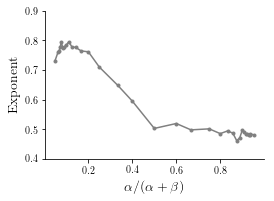

(0.4, 0.9)

In [11]:
widthCM = 10
heightCM = 7
f = figure(figsize=(widthCM/2.54, heightCM/2.54), dpi=72)
ax = gca()
rc("text", usetex=true)
rc("font",family="serif", serif = "Computer Modern")

ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
tight_layout(rect = [0.06, 0.04, 1, 1])

plot(prob,exp_fit,"-o", color ="gray", markersize = 3)
ylabel("Exponent",fontsize=14)
xlabel(L"\alpha/(\alpha + \beta)",fontsize=14)
ylim([0.4,0.9])

#savefig("./fig3b.pdf")

## Figure 4

### Panel (a), flat prior

With "stochastic hill climbing" method

In [ ]:
α,β = 1,1
#Adjustable number of samples to make the code run faster, 1E6 is good enough
utility_precision = 1E3
Ls = Any[]
us_max = Any[]
Cs = collect(1:20)
for j in Cs
    if j<=7
        L = Int64.(ones(j))
    else
        M = Int64(round(sqrt(j)))
        L = zeros(Int64,j)
        l_i = Int64(floor(j/M))
        for i in 1:M
            L[i] = l_i
        end
        L[M+1]=j-l_i*M
    end
    push!(L,0)
    #Adjust dist_prec to explore more or less distributions
    dist_prec = 50
    L_opt,u_max = dist_max(α,β,L,dist_prec,utility_precision,alice)
    pop!(L_opt)
    push!(Ls,L_opt)
    push!(us_max,u_max)
end

With $\epsilon$ - greedy policy iteration, where seed is depth extreme

In [12]:
#### THIS ONE TAKES TIME
Cs = collect(1:20)
α = 1
β = 1
ϵ = 0.1
L_opt = Any[]
policies = Any[]
Qs = Any[]
counts = Any[]
ns = Any[]
for i in 1:length(Cs)
    #Adjust number of episodes to run faster or with more precision
    if Cs[i] <= 10
        n_episodes = 1E3
    else
        n_episodes = 1E4
    end
    seed = [Cs[i]]
    p = policy_iteration_Bb(seed,ϵ,Cs[i],α,β,n_episodes);
    #pop!(p[1])
    for t in length(p[1])+1:Cs[i]
        push!(p[1],0)
    end
    push!(L_opt, p[1])
    if Cs[i] == 15
    push!(policies, p[2])
    push!(Qs, p[3])
    push!(counts, p[4])
    end
    push!(ns, p[end])
end

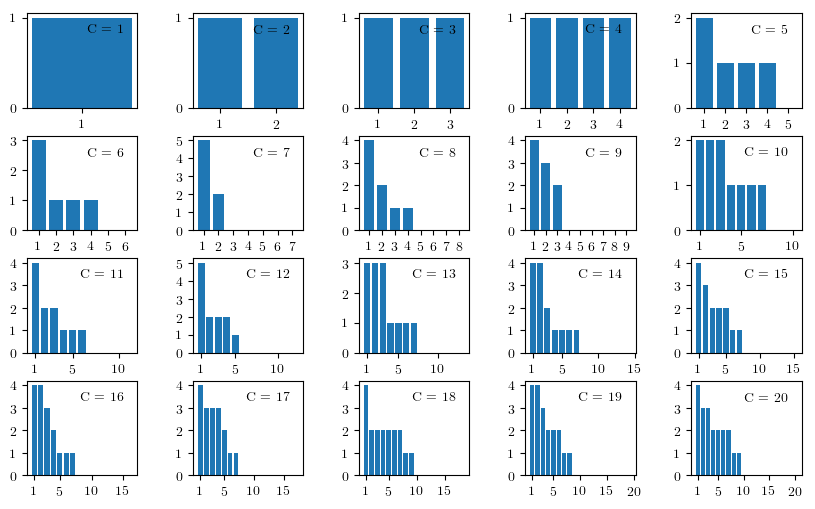

In [13]:
figure(figsize=(10,6))
subplots_adjust(wspace=0.5,hspace=0.3)
for i in 1:length(Cs)
subplot(4,5,i)
    annotate("C = $(Cs[i])",
	xy=[1;0.6],
	xycoords="axes fraction",
	xytext=[-10,10],
	textcoords="offset points",
	fontsize=10.0,
	ha="right",
	va="bottom")
    yticks([0,1,2,3,4,5,6,7,8,9,10])
    if Cs[i] <= 9
        xticks([1:1:Cs[i];])
    else
        xti=[5:5:Cs[i]+1;]
        pushfirst!(xti,1)
        xticks(xti)
    end
    x = [1:1:Cs[i];]
    bar(x,L_opt[i])
end
#savefig("./fig4a.png")

### Panel (b)-(c), non-flat priors

In [ ]:
α_poor = 1
β_poor = 3
α_rich = 3
β_rich = 1
#Adjustable number of samples to make the code run faster, 1E6 is good enough
utility_precision = 1E3
Ls_rich = Any[]
Ls_poor = Any[]
us_max_rich = Any[]
us_max_poor = Any[]
Cs = collect(1:20)
for j in Cs
    if j<=7
        L = Int64.(ones(j))
    else
        M = Int64(round(sqrt(j)))
        L = zeros(Int64,j)
        l_i = Int64(floor(j/M))
        for i in 1:M
            L[i] = l_i
        end
        L[M+1]=j-l_i*M
    end
    #Adjust dist_prec to explore more or less distributions
    dist_prec = 50
    L_opt_rich,u_max_rich = dist_max(α_rich,β_rich,L,dist_prec,utility_precision,alice)
    L_opt_poor,u_max_poor = dist_max(α_poor,β_poor,L,dist_prec,utility_precision,alice)
    push!(Ls_rich,L_opt_rich)
    push!(Ls_poor,L_opt_poor)
    push!(us_max_rich,u_max_rich)
    push!(us_max_poor,u_max_poor)
end

In [ ]:
figure(figsize=(10,6))
subplots_adjust(wspace=0.5,hspace=0.3)
for i in 1:length(Cs)
subplot(5,4,i)
    annotate("C = $(Cs[i])",
	xy=[1;0.6],
	xycoords="axes fraction",
	xytext=[-10,10],
	textcoords="offset points",
	fontsize=10.0,
	ha="right",
	va="bottom")
    yticks([0,1,2,3,4,5,6,7,8,9,10])
    if Cs[i] < 9
        xticks([1:1:Cs[i];])
    else
        xti=[5:5:Cs[i]+1;]
        pushfirst!(xti,1)
        xticks(xti)
    end
    x = [1:1:Cs[i];]
    bar(x,Ls_rich[i])
end
#savefig("./fig4b.png")

In [ ]:
figure(figsize=(10,6))
subplots_adjust(wspace=0.5,hspace=0.3)
for i in 1:length(Cs)
subplot(5,4,i)
    annotate("C = $(Cs[i])",
	xy=[1;0.6],
	xycoords="axes fraction",
	xytext=[-10,10],
	textcoords="offset points",
	fontsize=10.0,
	ha="right",
	va="bottom")
    yticks([0,1,2,3,4,5,6,7,8,9,10])
    if Cs[i] <= 9
        xticks([1:1:Cs[i];])
    else
        xti=[5:5:Cs[i]+1;]
        pushfirst!(xti,1)
        xticks(xti)
    end
    x = [1:1:Cs[i];]
    bar(x,Ls_poor[i])
end
#savefig("./fig4c.png")

## Figure 5

In [ ]:
#This one takes time! To get a rough estimate, decrease the precision below, or the number of perturbations "sample"
#C = [3,5,7,8,9,10,15,20,30,40]
C = [2,3,4,5,6,7,8,9,10,20,50,100,200,500]
α_poor = 1
β_poor = 3
α_rich = 3
β_rich = 1
alice = false
#Adjustable number of samples to make the code run faster
utility_precision = 1E3
U_uni_flat = zeros(length(C))
U_uni_rich = zeros(length(C))
U_uni_poor = zeros(length(C))
U_optimal_flat = zeros(length(C))
U_optimal_rich = zeros(length(C))
U_optimal_poor = zeros(length(C))
Ls_flat = Any[]
Ls_rich = Any[]
Ls_poor = Any[]
U_optimal_flat = Any[]
U_optimal_rich = Any[]
U_optimal_poor = Any[]
M_opt_flat = zeros(length(C))
M_opt_rich = zeros(length(C))
M_opt_poor = zeros(length(C))
for j in 1:length(C)
    M = divisors(C[j])
    #Square-root law heuristic
    if C[j]<=7
        L = Int64.(ones(C[j]))
    else
        M_o = Int64(floor(sqrt(C[j])))
        L = zeros(Int64,C[j])
        for i in 1:M_o
             L[i] = M_o
        end
        L[M_o+1]=C[j]-M_o*M_o
    end
    #Estimate the estimate of utility for square-root distributions with following precision
    uni_prec = 1E4
    #U_uni_flat[j]=utility_estimate(L,3,3,uni_prec,alice)
    #U_uni_poor[j]=utility_estimate(L,α_poor,β_poor,uni_prec,alice)
    #U_uni_rich[j]=utility_estimate(L,α_rich,β_rich,uni_prec,alice)
    #Setting the number of perturbations proposed
    if C[j] >= 100
        sample = 2500
    else
        sample = 20*C[j]
    end
    #Optimal distribution
    L_opt_rich,u_max_rich = dist_max(α_rich,β_rich,L,sample,utility_precision,alice)
    L_opt_poor,u_max_poor = dist_max(α_poor,β_poor,L,sample,utility_precision,alice)
    L_opt_flat,u_max_flat = dist_max(1,1,L,sample,utility_precision,alice)
    push!(Ls_flat,L_opt_flat)
    push!(Ls_rich,L_opt_rich)
    push!(Ls_poor,L_opt_poor)
    push!(U_optimal_flat,u_max_flat)
    push!(U_optimal_rich,u_max_rich)
    push!(U_optimal_poor,u_max_poor)
end

#### Panel (a)

In [ ]:
semilogx(C,((U_optimal_flat-U_uni_flat)./(U_uni_flat)).*100,"-",label="Flat")
semilogx(C,((U_optimal_rich-U_uni_rich)./(U_uni_rich)).*100,"-",label="rich")
semilogx(C,((U_optimal_poor-U_uni_poor)./(U_uni_poor)).*100,"-",label="poor")
xticks(C)
yticks([-5,0,5,10])
legend()
xlabel("Capacity")
ylabel("% improvement");
#savefig("./fig5a.png")

#### Panel (b)

In [ ]:
frac_sampled_flat = zeros(length(C))
frac_sampled_rich = zeros(length(C))
frac_sampled_poor = zeros(length(C))
for j in 1:length(C)
    for i in 1:length(Ls_flat[j])
        if Ls_flat[j][i] > 0
            frac_sampled_flat[j] += 1
        end
        if Ls_poor[j][i] > 0
            frac_sampled_poor[j] += 1
        end
        if Ls_rich[j][i] > 0
            frac_sampled_rich[j] += 1
        end
    end
end

In [ ]:
widthCM = 8
heightCM = 7
f = figure(figsize=(widthCM/2.54, heightCM/2.54), dpi=72)
plot(C,frac_sampled_poor./C,"o-",label="Poor")
plot(C,frac_sampled_flat./C,"o-",label="Neutral")
plot(C,frac_sampled_rich./C,"o-",label="Rich")
tight_layout(rect = [0.06, 0.04, 1, 1])

#xticks(C)
yticks([0,0.5,1])
legend()
xlabel("capacity",fontsize = 14)
ylabel("M/capacity",fontsize = 14);
#savefig("./fig5b.pdf")

## Figure 6

In [14]:
#### THIS ONE TAKES TIME
Cs = collect(1:20)
α = 1
β = 1
ϵ = 0.1
M_opt = Any[]
policies = Any[]
Qs = Any[]
counts = Any[]
ns = Any[]
for i in 1:length(Cs)
    if Cs[i] <= 5
        n_episodes = 1E5
    else
        n_episodes = 1E6
    end
    seed = [Cs[i],0]
    p = policy_iteration(seed,ϵ,Cs[i],α,β,n_episodes);
    pop!(p[1])
    for t in length(p[1])+1:Cs[i]
        push!(p[1],0)
    end
    push!(M_opt, p[1])
    if Cs[i] == 15
    push!(policies, p[2])
    push!(Qs, p[3])
    push!(counts, p[4])
    end
    push!(ns, p[end])
end

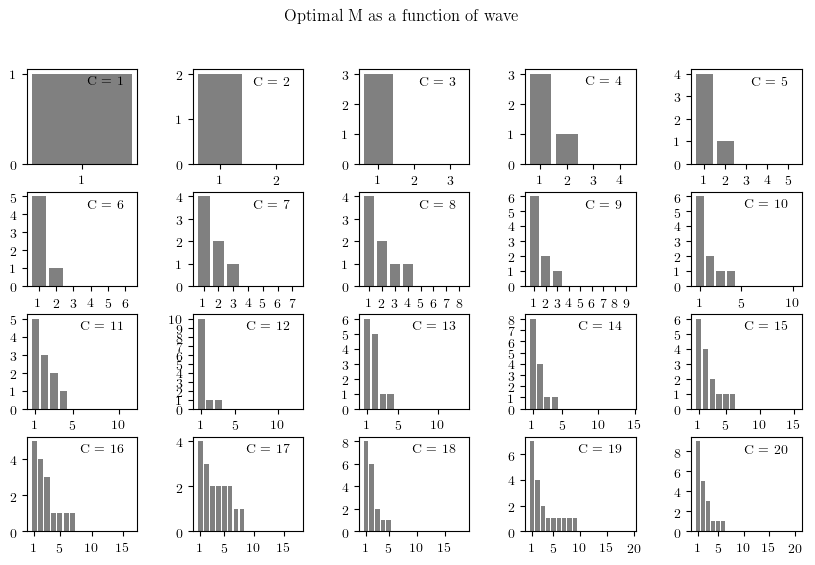

In [15]:
figure(figsize=(10,6))
subplots_adjust(wspace=0.5,hspace=0.3)
suptitle("Optimal M as a function of wave")
for i in 1:length(Cs)
subplot(4,5,i)
    annotate("C = $(Cs[i])",
	xy=[1;0.65],
	xycoords="axes fraction",
	xytext=[-10,10],
	textcoords="offset points",
	fontsize=10.0,
	ha="right",
	va="bottom")

    if Cs[i] <= 9
        xticks([1:1:Cs[i];])
    else
        xti=[5:5:Cs[i]+1;]
        pushfirst!(xti,1)
        xticks(xti)
    end
    if Cs[i] <= 15
        yticks([0,1,2,3,4,5,6,7,8,9,10])
    else
        yticks(collect(0:2:maximum(M_opt[i])))
    end
    x = [1:1:Cs[i];]
    bar(x,M_opt[i],color = "gray")
end
#savefig("./fig6a.pdf")

Looking at the utility of the many policies we have evaluated

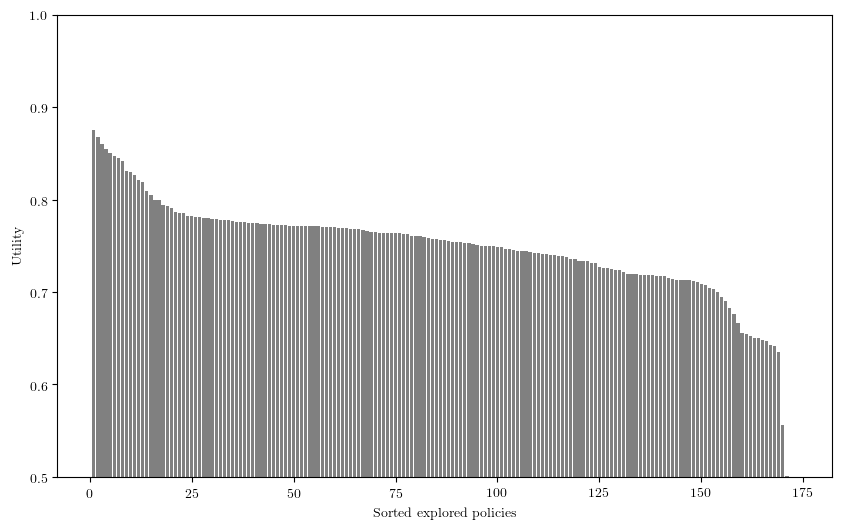

PyObject Text(0.5, 24.0, 'Sorted explored policies')

In [16]:
figure(figsize=(10,6))
x = [1:1:length(Qs[1]);]
bar(x,sort(Qs[1], rev=true),color = "gray")
ylim([0.5,1.0])
ylabel("Utility")
xlabel("Sorted explored policies")
#savefig("qs_C_15_e_0p1.pdf")

## SI: Gaussian distributed samples

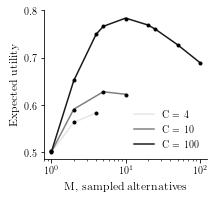

In [17]:
widthCM = 8
heightCM = 7
f = figure(figsize=(widthCM/2.54, heightCM/2.54), dpi=72)
ax = gca()
rc("text", usetex=true)
rc("font",family="serif", serif = "Computer Modern")
C = [4,10,100]
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
N_sim = 1E5
N_points = 1E5
σ = 1
colors = get_cmap("gray_r")
cindex = [0.1,0.5,0.9]
for j in 1:length(C)
    M = divisors(C[j])
    U_sim = zeros(length(M))
    U_arb = zeros(length(M))
    U = zeros(length(M))
    var = zeros(length(M))
    for i in 1:length(M)
        L = ones(Int64,M[i]).*Int64(C[j]/M[i])
        U[i] = utility_uniform_Gauss(C[j],M[i],σ,N_points)
        U_sim[i] = utility_sim_Gauss(L,σ,N_sim)
    end
    errs = sqrt.(var)
    plot(M,U,"-",color = colors(cindex[j]), label=string("C = ",C[j]))
    plot(M,U_sim,"ko",markersize = 3)
end
tight_layout(rect = [0.06, 0.04, 1, 1])
legend(loc=4,fontsize=10, ncol = 1, frameon =false);
xscale("log")
yticks([0.5,0.6,0.7,0.8]);
ylabel("Expected utility",fontsize = 12)
xlabel("M, sampled alternatives",fontsize = 12);
#savefig("./SIa.pdf")

In [18]:
C = [2,3,5,7,10,15,20,50,70,100,300,500,700,1000,3000,10000]
max_U_1 = zeros(length(C))
max_U_2 = zeros(length(C))
max_U_3 = zeros(length(C))
M_opt_1 = zeros(length(C))
M_opt_2 = zeros(length(C))
M_opt_3 = zeros(length(C))
M_opt_1_sim = zeros(length(C))
M_opt_2_sim = zeros(length(C))
M_opt_3_sim = zeros(length(C))
σ_1 = 0.1
σ_2 = 1
σ_3 = 10
alice = false
N_sim = Int64(1E5)
N_points = Int64(1E4)
C_sim = 100
for j in 1:length(C)
    M = divisors(C[j])
    U_1_sim = zeros(length(M))
    U_2_sim = zeros(length(M))
    U_3_sim = zeros(length(M))
    U_1_ana = zeros(length(M))
    U_2_ana = zeros(length(M))
    U_3_ana = zeros(length(M))
    for i in 1:length(M)        
        L = ones(Int64,M[i]).*Int64(C[j]/M[i])
        if C[j] <= C_sim
            U_1_sim[i] = utility_sim_Gauss(L,σ_1,N_sim,alice)
            U_2_sim[i] = utility_sim_Gauss(L,σ_2,N_sim,alice)
            U_3_sim[i] = utility_sim_Gauss(L,σ_3,N_sim,alice)
        end
        U_1_ana[i] = utility_uniform_Gauss(C[j],M[i],σ_1,N_points)
        U_2_ana[i] = utility_uniform_Gauss(C[j],M[i],σ_2,N_points)
        U_3_ana[i] = utility_uniform_Gauss(C[j],M[i],σ_3,N_points)#uni_utility(C[j],M[i],α_poor,β_poor,alice)
    end
    M_opt_1[j] = M[findmax(U_1_ana)[2]]
    M_opt_2[j] = M[findmax(U_2_ana)[2]]
    M_opt_3[j] = M[findmax(U_3_ana)[2]]
    M_opt_1_sim[j] = M[findmax(U_1_sim)[2]]
    M_opt_2_sim[j] = M[findmax(U_2_sim)[2]]
    M_opt_3_sim[j] = M[findmax(U_3_sim)[2]]
end

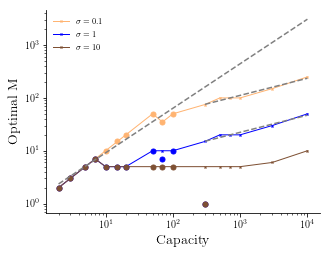

In [19]:
widthCM = 12
heightCM = 9
f = figure(figsize=(widthCM/2.54, heightCM/2.54), dpi=72)
ax = gca()
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
sim_cutoff = 11
colors = get_cmap("copper_r")
cindex = [0.1,0.5,0.9]
loglog(C,M_opt_1,"x-",color = colors(cindex[1]),linewidth=1,label=L"\sigma = 0.1",markersize = 2)
loglog(C,M_opt_2,"bx-",linewidth=1, label=L"\sigma = 1",markersize = 2)
loglog(C,M_opt_3,"x-",color = colors(0.6),linewidth=1,label=L"\sigma = 10",markersize = 2)

loglog(C[1:sim_cutoff],M_opt_1_sim[1:sim_cutoff],"o",color = colors(cindex[1]),markersize=5)
loglog(C[1:sim_cutoff],M_opt_2_sim[1:sim_cutoff],"bo",markersize=5)
loglog(C[1:sim_cutoff],M_opt_3_sim[1:sim_cutoff],"o",color = colors(0.6),markersize=5)

#Fit only when trend starts growing
sig1end = 10
sig2end = 10
sig3end = 15
start = fend + 1
b1p,m1p=linear_fit(log.(C[1:sig1end]),log.(M_opt_1_sim[1:sig1end]))
b2p,m2p=linear_fit(log.(C[sig1end+1:end]),log.(M_opt_1[sig1end+1:end]))
b2r,m2r=linear_fit(log.(C[sig2end+1:end]),log.(M_opt_2[sig2end+1:end]))
b23,m23=linear_fit(log.(C[sig3end+1:end]),log.(M_opt_3[sig3end+1:end]))

M_fitted1p = exp.(log.(C[1:end]).*m1p .+ b1p)
M_fitted2p = exp.(log.(C[sig1end+1:end]).*m2p .+ b2p)
M_fitted2r = exp.(log.(C[sig2end+1:end]).*m2r .+ b2r)
M_fitted23 = exp.(log.(C[sig3end+1:end]).*m23 .+ b23)
loglog(C[1:end],M_fitted1p,"--",color = "gray")
loglog(C[sig1end+1:end],M_fitted2p,"--",color = "gray")
loglog(C[sig2end+1:end],M_fitted2r,"--",color = "gray")
loglog(C[sig3end+1:end],M_fitted23,"--",color = "gray")

tight_layout(rect = [0.06, 0.04, 1, 1])

xlabel("Capacity",fontsize=14)
ylabel("Optimal M",fontsize=14)
legend(loc=2,fontsize=8, ncol = 1, frameon =false);
#savefig("./SIb.pdf")